In [1]:
import dlsfunctions as dls
import initialization_data as init
import numpy as np
import matplotlib.pyplot as plt

In [11]:
time = init.get_time()
d = init.get_distance()

gamma = init.get_gamma()

mean = init.get_central_mean()

sigma = init.get_normal_sigma()

m = init.m
c = init.c
beta = init.beta

f = dls.generate_distribution(d, mean, sigma, c)
noise = np.random.normal(mean, sigma, 200)*1e7

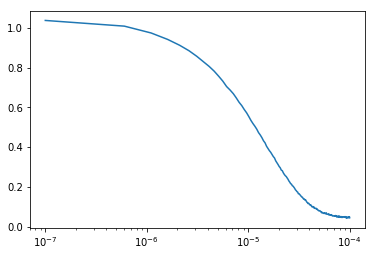

In [12]:
theta_input = np.append(f, beta)
sim_data = dls.g2(theta_input, d, m, gamma, time) + noise
plt.semilogx(time, sim_data)

In [13]:
ndim = 21
nwalkers = 100
nsteps = 1000

In [14]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time)

In [15]:
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.337, 0.384, 0.375, 0.381, 0.371, 0.363, 0.366, 0.354, 0.345,
       0.377, 0.391, 0.369, 0.393, 0.372, 0.379, 0.366, 0.393, 0.393,
       0.347, 0.376, 0.373, 0.368, 0.36 , 0.374, 0.401, 0.384, 0.362,
       0.35 , 0.367, 0.352, 0.332, 0.375, 0.346, 0.383, 0.369, 0.359,
       0.38 , 0.374, 0.365, 0.358, 0.366, 0.368, 0.329, 0.374, 0.373,
       0.354, 0.372, 0.365, 0.385, 0.354, 0.375, 0.363, 0.367, 0.378,
       0.357, 0.335, 0.37 , 0.348, 0.384, 0.37 , 0.377, 0.385, 0.35 ,
       0.355, 0.364, 0.399, 0.346, 0.379, 0.331, 0.381, 0.37 , 0.326,
       0.365, 0.354, 0.353, 0.364, 0.372, 0.388, 0.363, 0.361, 0.344,
       0.343, 0.379, 0.375, 0.372, 0.384, 0.358, 0.387, 0.364, 0.394,
       0.37 , 0.368, 0.377, 0.377, 0.394, 0.368, 0.388, 0.382, 0.368,
       0.382])

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


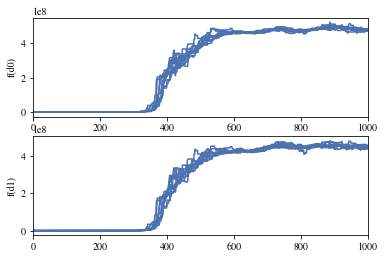

In [16]:
dls.view_burnin_plot(result, 0, 1)

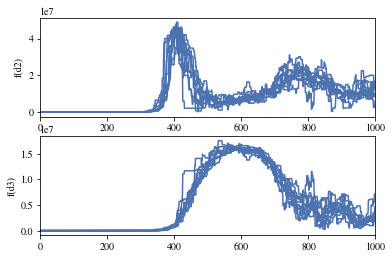

In [17]:
dls.view_burnin_plot(result,2 , 3)

In [18]:
chained_sampler = dls.chain(result, 850, ndim)

In [20]:
samples_df = dls.create_dataframe(chained_sampler, ndim)
samples_df = samples_df.quantile([0.5], axis=0)
samples_df

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,4.889408e+08,4.540129e+08,2.856612e+08,1.371311e+08,6.037096e+08,2.631802e+08,5.551847e+08,4.411809e+08,1.819447e+08,8.991988e+07,3.646155e+08,4.583247e+08,1.043502e+07,3.181331e+06,4.846097e+08,1.082702e+07,5.445835e+08,2.116583e+07,1.607716e+09,8.379167e+06


In [22]:
infer = np.zeros(20)
infer[0] = 4.889408e+08
infer[1] = 4.540129e+08
infer[2] = 1.043502e+07
infer[3] = 3.181331e+06
infer[4] = 4.846097e+08
infer[5] = 1.082702e+07
infer[6] = 5.445835e+08
infer[7] = 2.116583e+07
infer[8] = 1.607716e+09
infer[9] = 8.379167e+06
infer[10] = 2.856612e+08
infer[11] = 1.371311e+08
infer[12] = 6.037096e+08
infer[13] = 2.631802e+08
infer[14] = 5.551847e+08
infer[15] = 4.411809e+08
infer[16] = 1.819447e+08
infer[17] = 8.991988e+07
infer[18] = 3.646155e+08
infer[19] = 4.583247e+08


In [25]:
beta = dls.get_beta(chained_sampler, ndim)
beta_infer = beta.quantile([0.5],axis=0)
beta_infer

,beta
0.5,0.901899


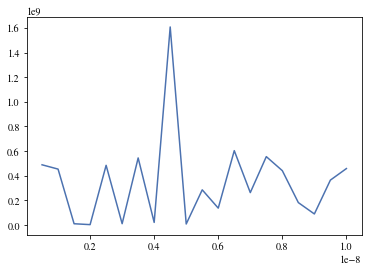

In [23]:
plt.plot(d, infer)

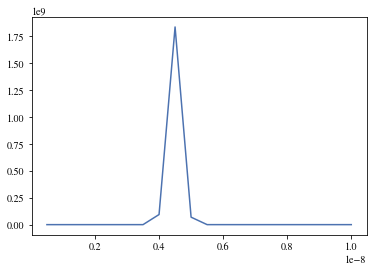

In [24]:
plt.plot(d, f)

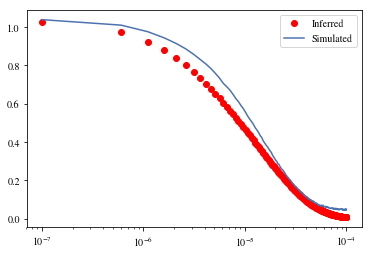

In [26]:
inferg2 = dls.g2(np.append(infer, 0.901), d, m, gamma, time)
plt.semilogx(time, inferg2, 'ro', label='Inferred')
plt.semilogx(time, sim_data, label='Simulated')
plt.legend()

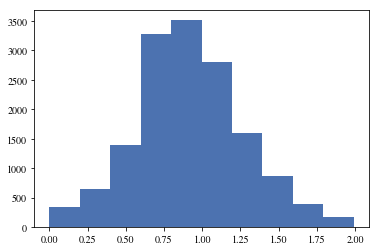

In [27]:
beta_posterior = beta.values
beta_array = beta_posterior.flatten()

plt.hist(beta_array)
plt.show()